## EDA esercizio
<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/EDA2.jpg" width=800 >


# TIPS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


A data frame with 244 observations on the following 8 variables.


**total_bill:** a numeric vector, the bill amount (dollars)

**tip:**a numeric vector, the tip amount (dollars)

**sex:** factor with levels Female Male, gender of the payer of the bill

**smoker:** factor with levels No Yes, whether the party included smokers

**day:** factor with levels Friday Saturday Sunday Thursday, day of the week

**time:** factor with levels Day Night, rough time of day

**size:** numeric vector, number of people in party

In [ ]:
# sns.set()
# tips = sns.load_dataset("tips")
# tips.head()

In [2]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
tips.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [6]:
tips['smoker'].value_counts()

,count
smoker,
No,151
Yes,93


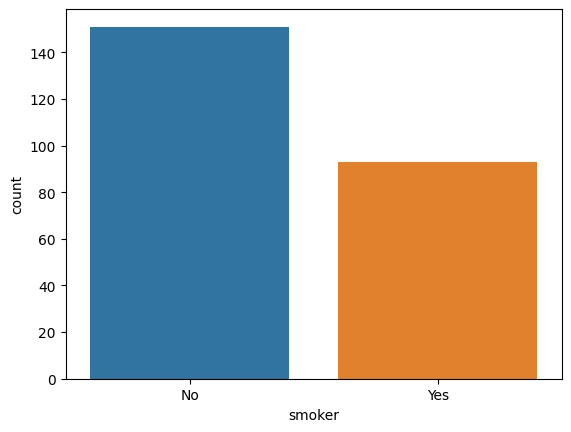

In [7]:
sns.countplot(x='smoker',data=tips,hue='smoker');

In [ ]:
tips['smoker'].value_counts(normalize=True)

,proportion
smoker,
No,0.618852
Yes,0.381148


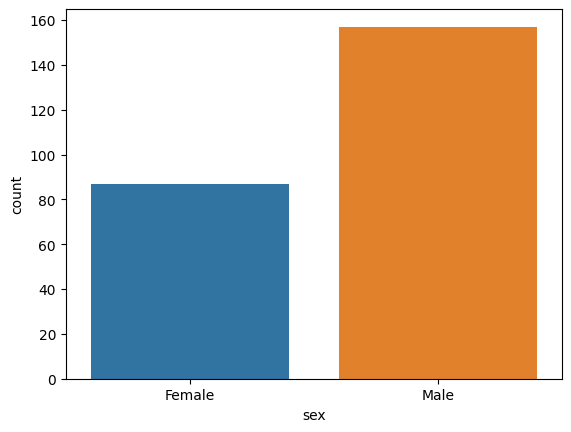

In [9]:
sns.countplot(x='sex',data=tips,hue='sex');

In [11]:
tips['sex'].value_counts(normalize=True)

,proportion
sex,
Male,0.643443
Female,0.356557


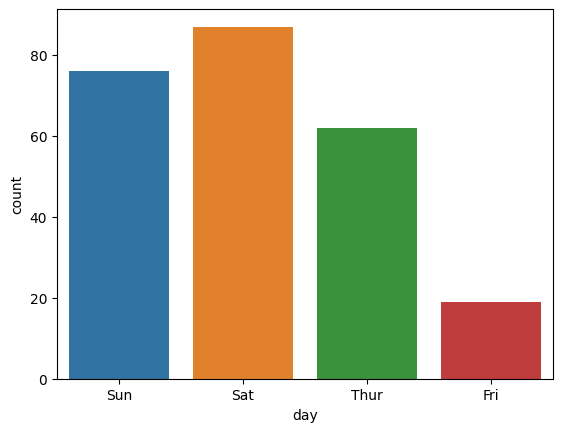

In [12]:
sns.countplot(x='day',data=tips,hue='day');

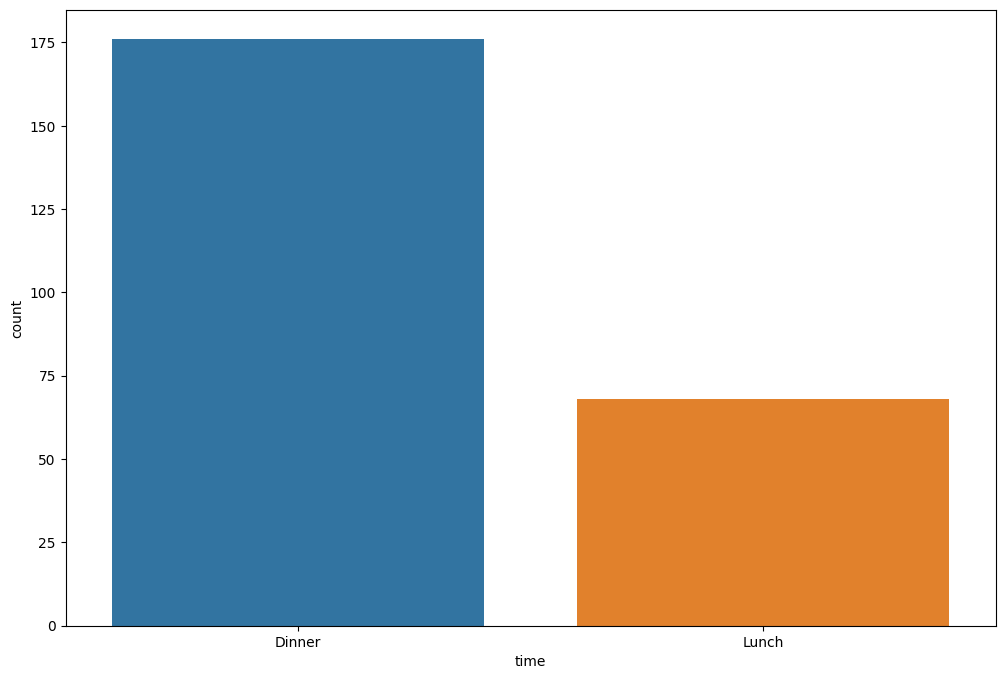

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x='time',data=tips,hue='time');

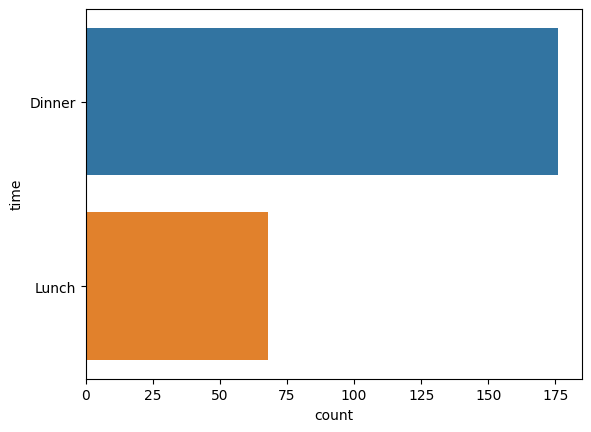

In [14]:
sns.countplot(y='time',data=tips,hue='time');

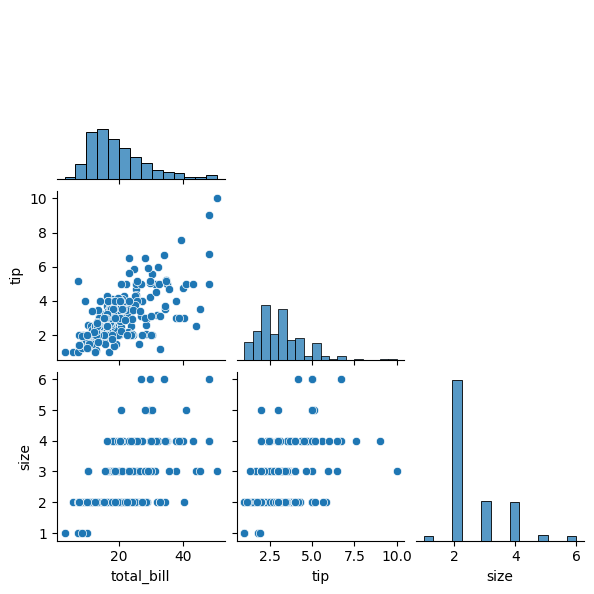

In [16]:
sns.pairplot(tips,height=2,corner=True)

In [ ]:
## Categorical = 'sex', 'smoker' , 'day', 'time' , 'size'

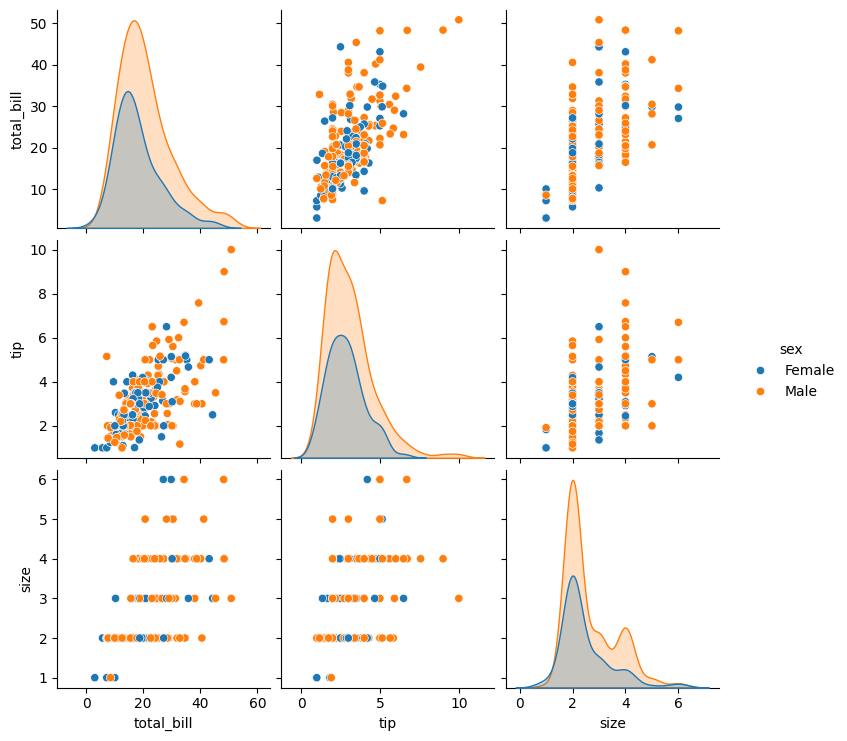

In [18]:
sns.pairplot(tips,height=2.5,hue='sex');

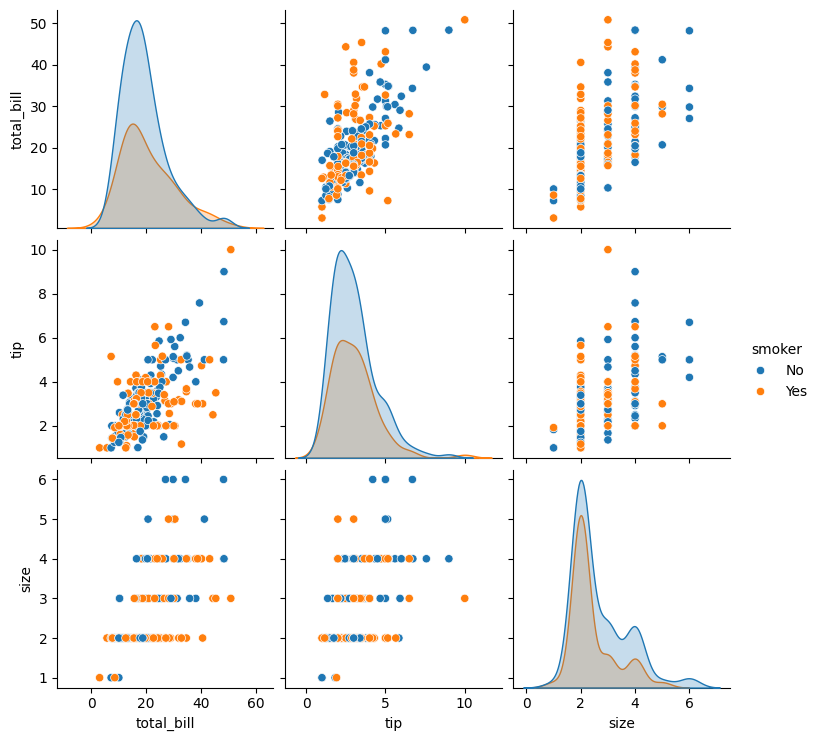

In [19]:
sns.pairplot(tips,height=2.5,hue='smoker');

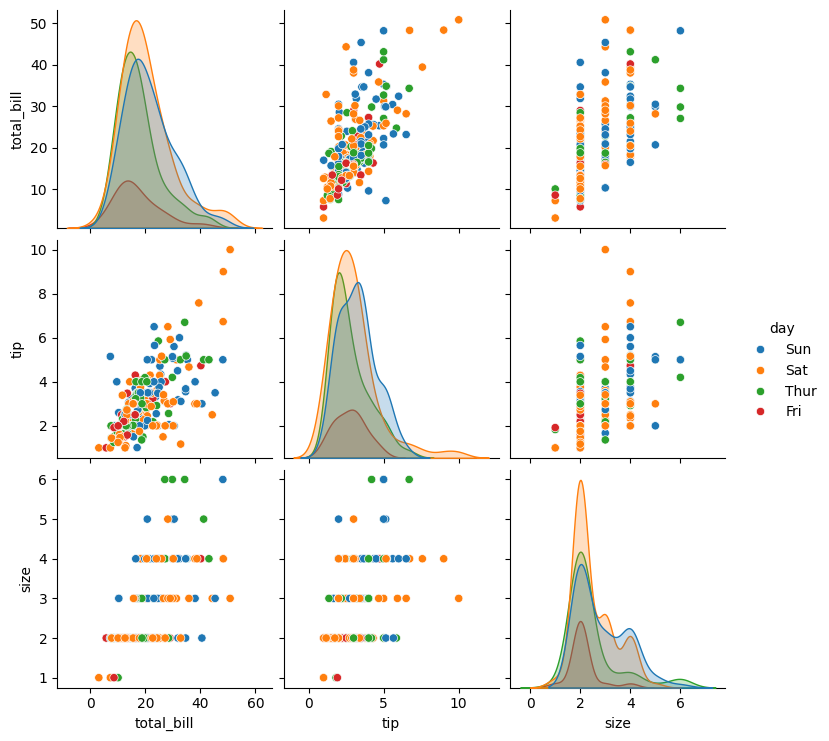

In [20]:
sns.pairplot(tips,height=2.5,hue='day');

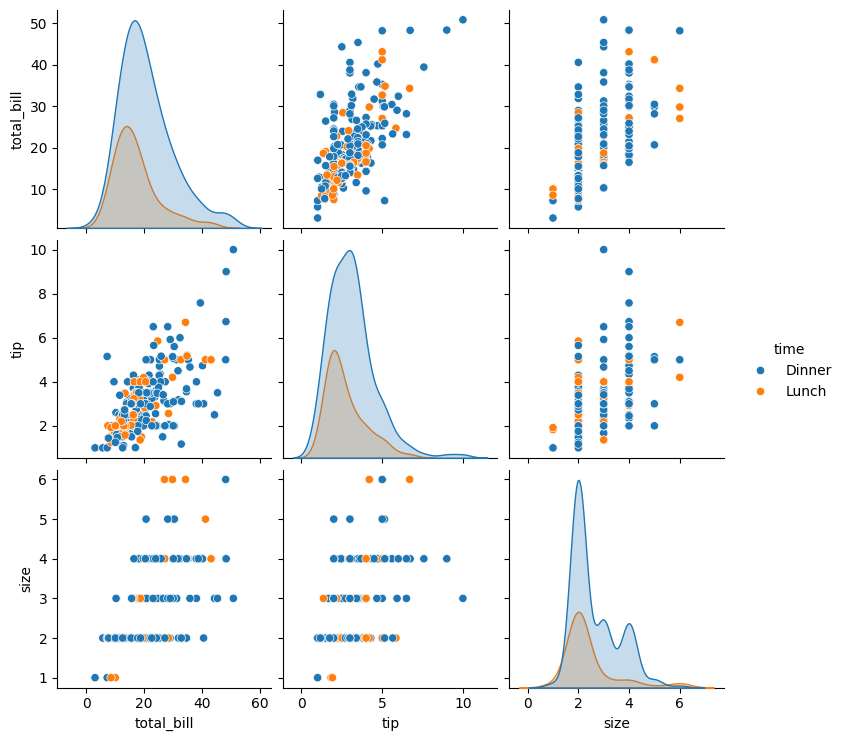

In [21]:
sns.pairplot(tips,height=2.5,hue='time');

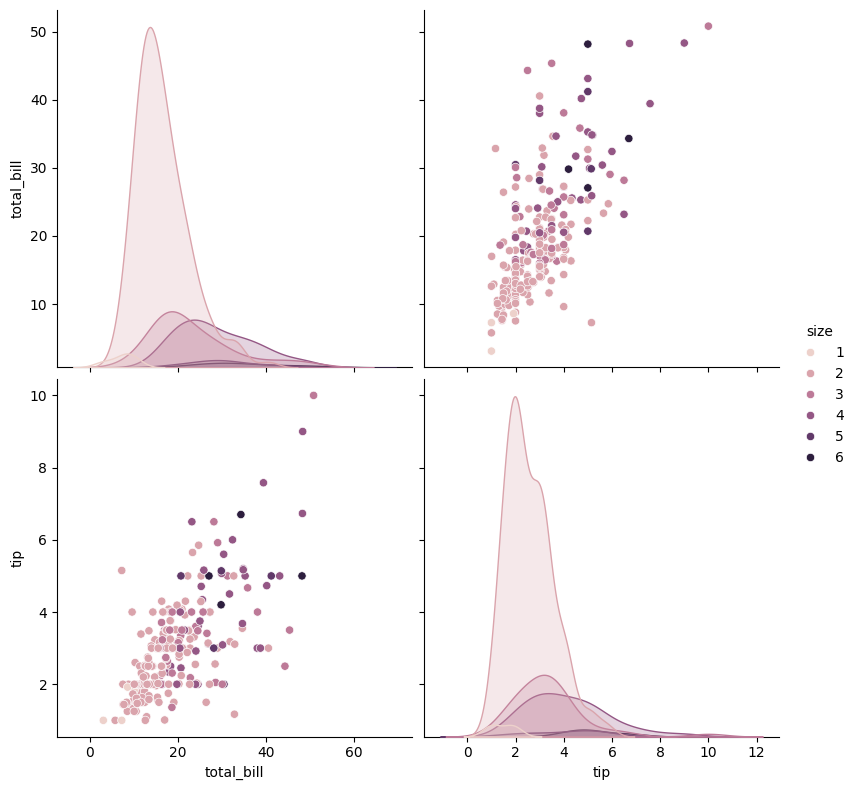

In [22]:
sns.pairplot(tips,height=4,hue='size');

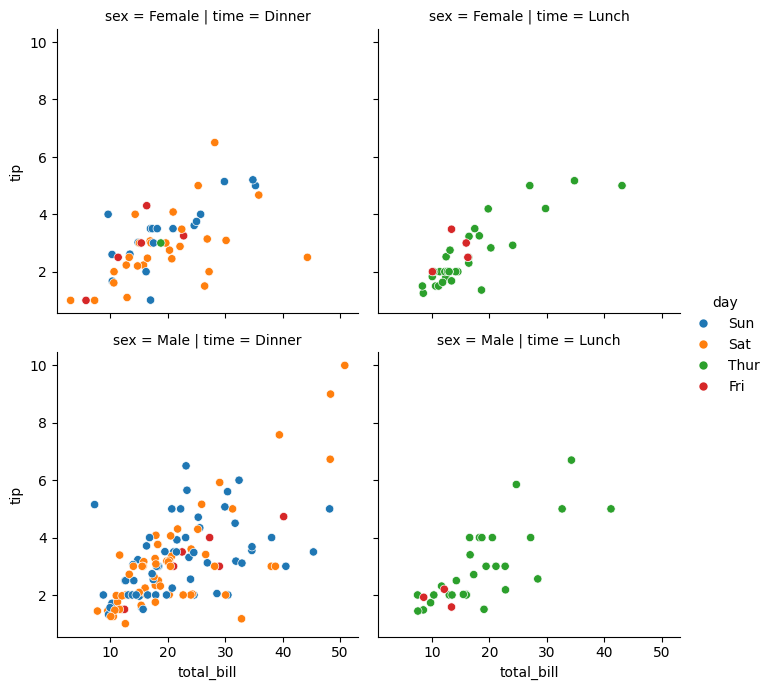

In [25]:
sns.relplot(x="total_bill", y="tip", hue="day",
                col="time", row="sex", data=tips,height=3.5);

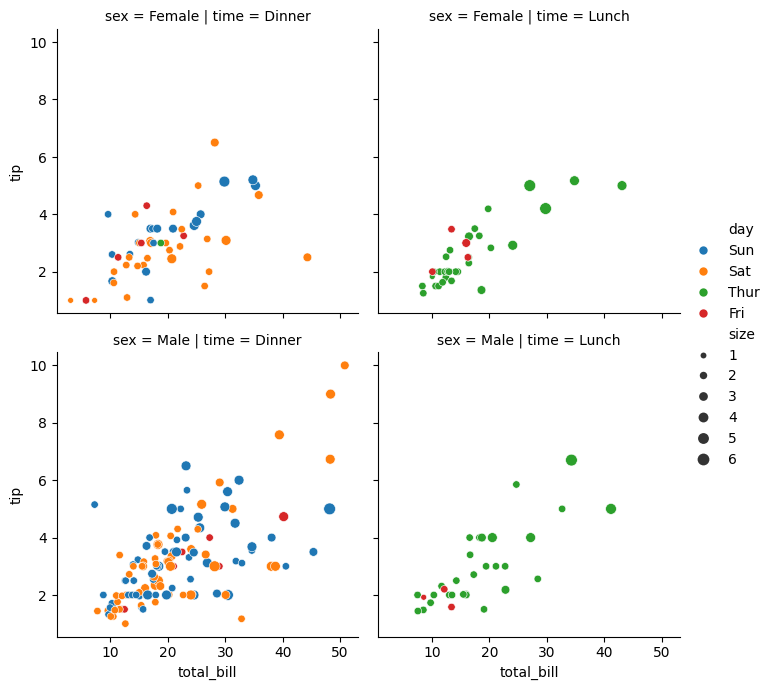

In [26]:
sns.relplot(x="total_bill", y="tip", hue="day",
                col="time", row="sex", size="size",data=tips,height=3.5);

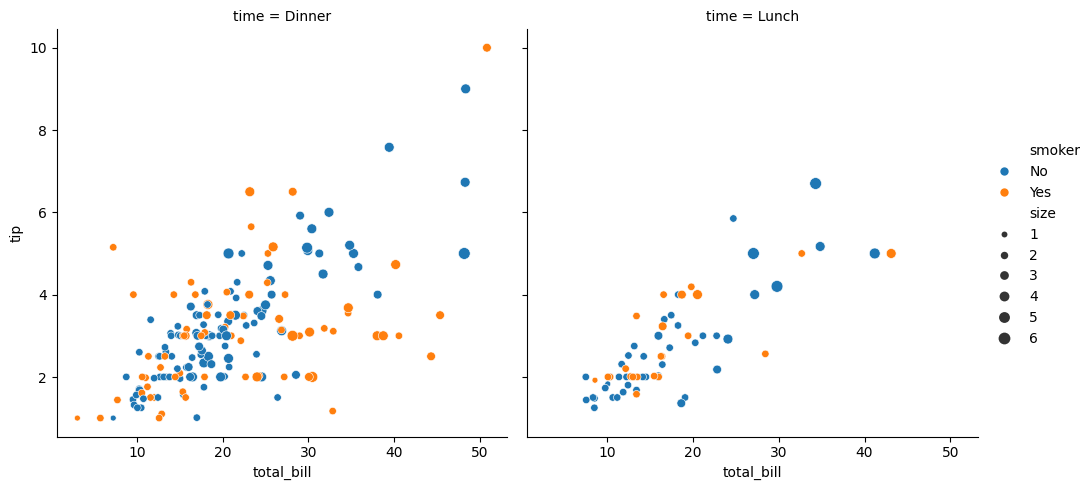

In [27]:
sns.relplot(x="total_bill", y="tip", col="time",hue="smoker", size="size",
            data=tips);

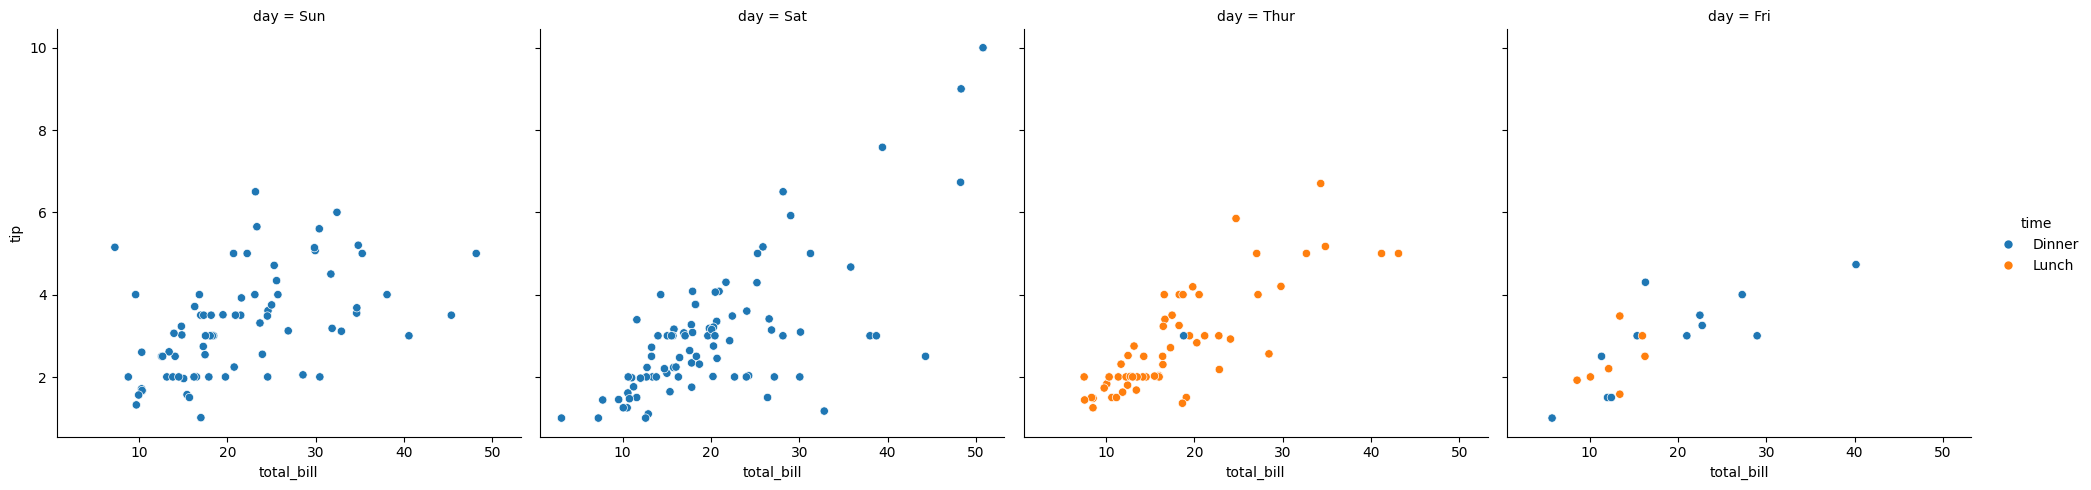

In [28]:
sns.relplot(x="total_bill", y="tip", hue="time",col="day", data=tips)

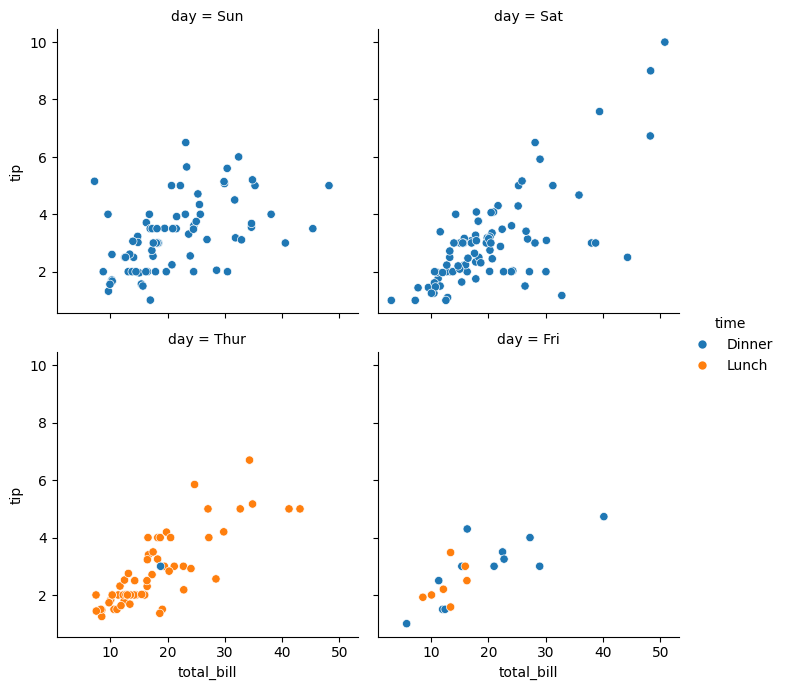

In [29]:
sns.relplot(x="total_bill", y="tip", hue="time",col="day", col_wrap=2, data=tips,height=3.5)

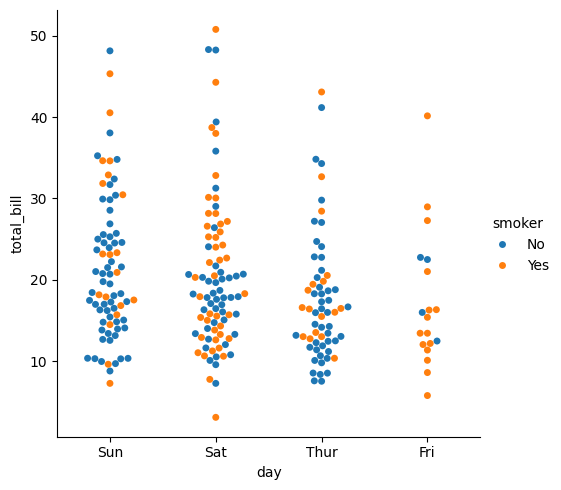

In [31]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="swarm", data=tips,
            height=5);

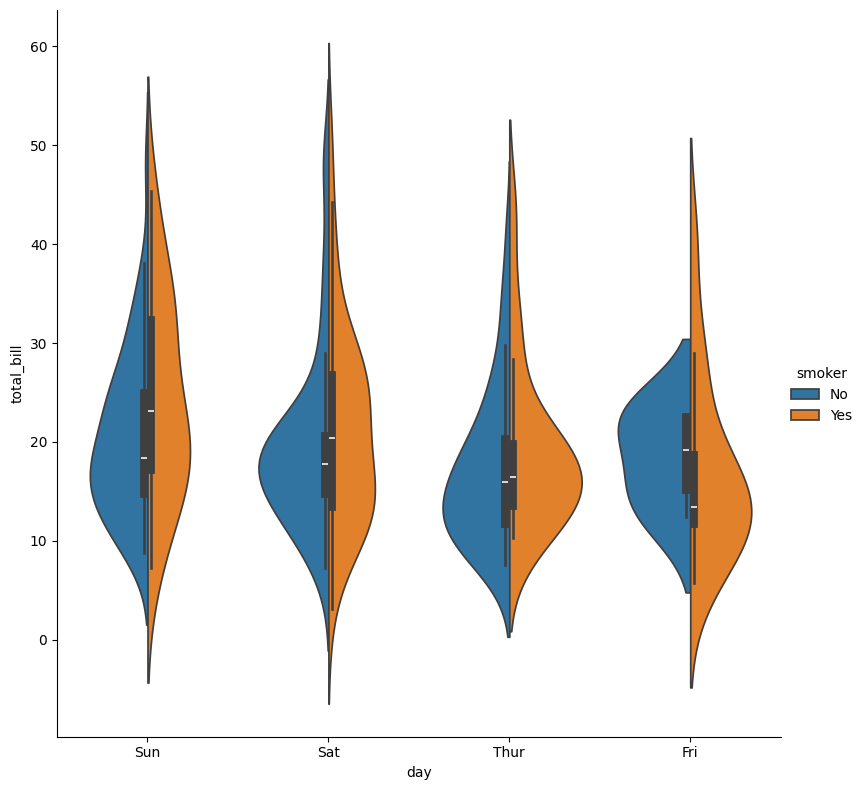

In [32]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="violin", split=True, data=tips,
            height=8,aspect=1);

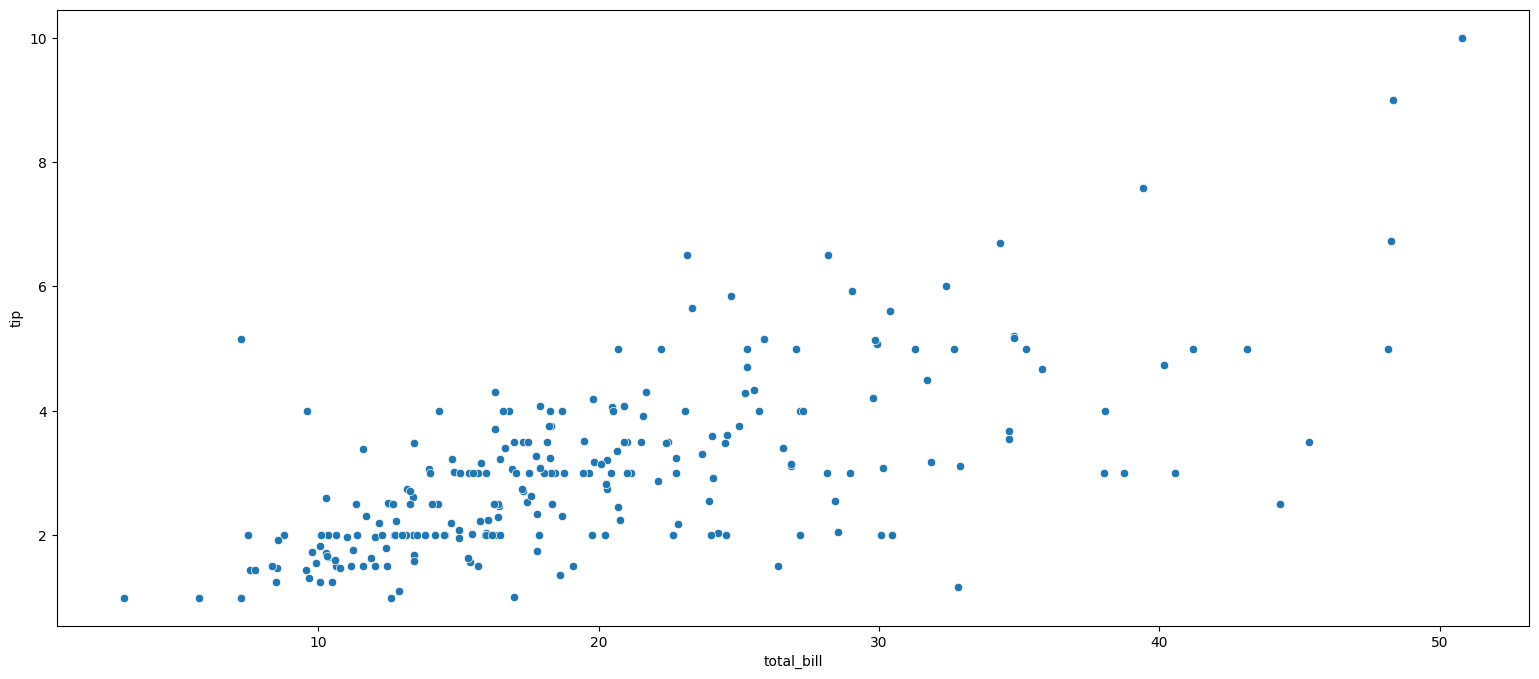

In [33]:
plt.figure(figsize=(19,8))
sns.scatterplot(x="total_bill", y="tip", data=tips);

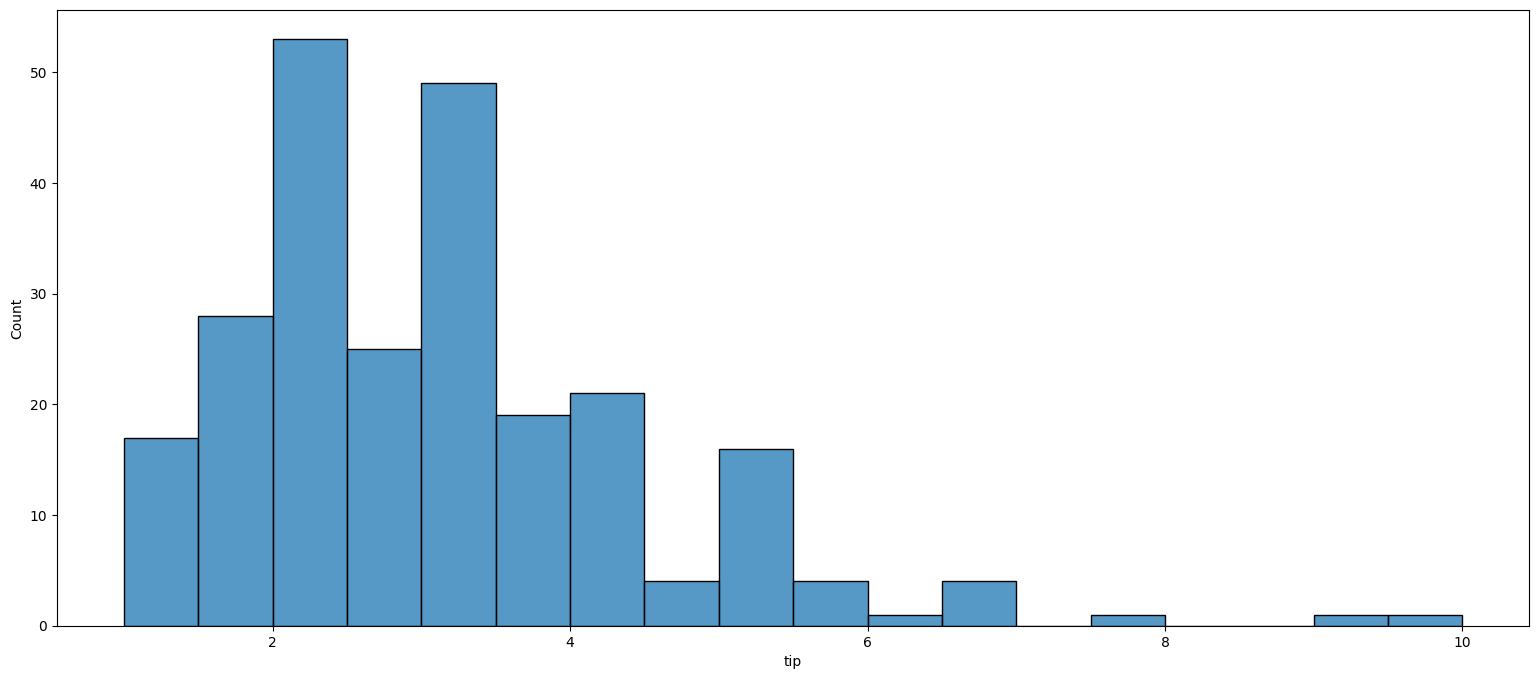

In [34]:
plt.figure(figsize=(19,8))
sns.histplot(tips['tip']);

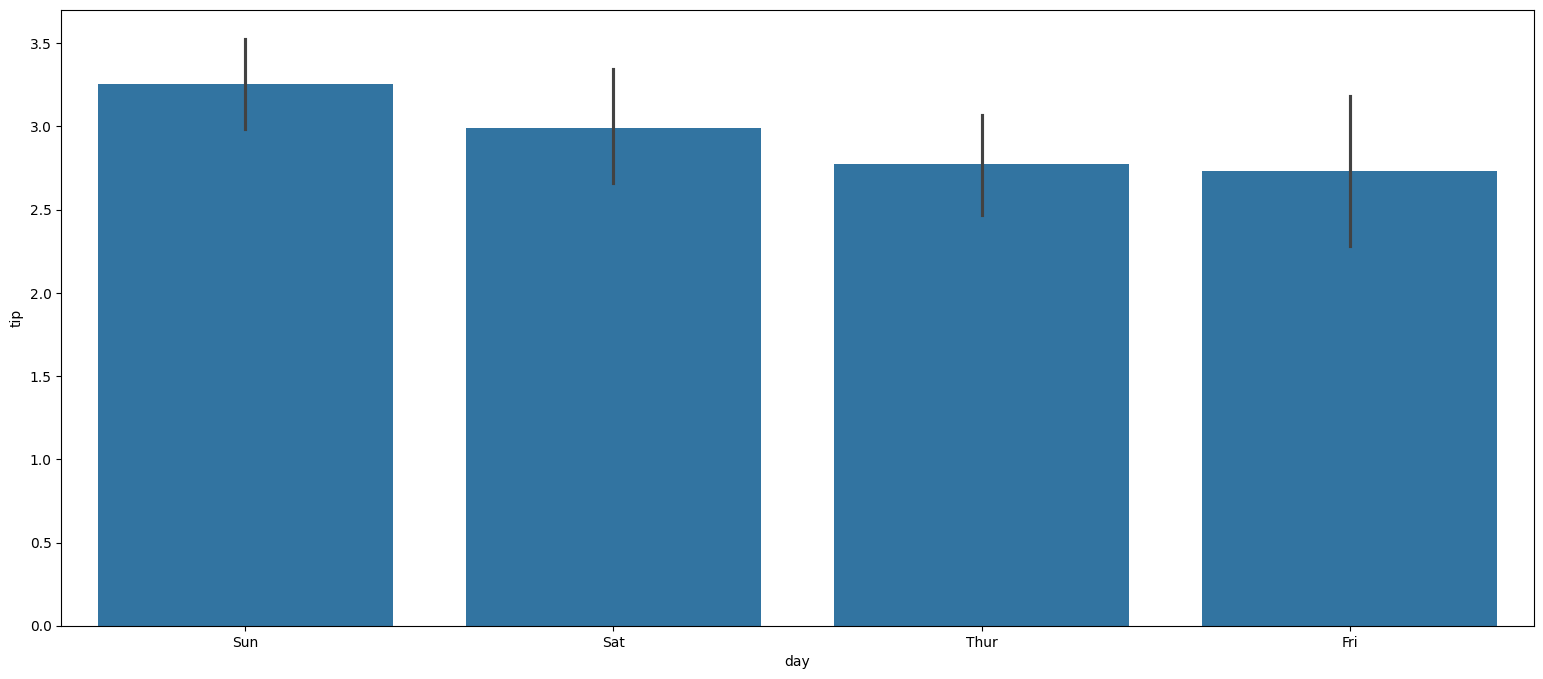

In [ ]:
plt.figure(figsize=(19,8))
sns.barplot(x="day", y="tip", data = tips);

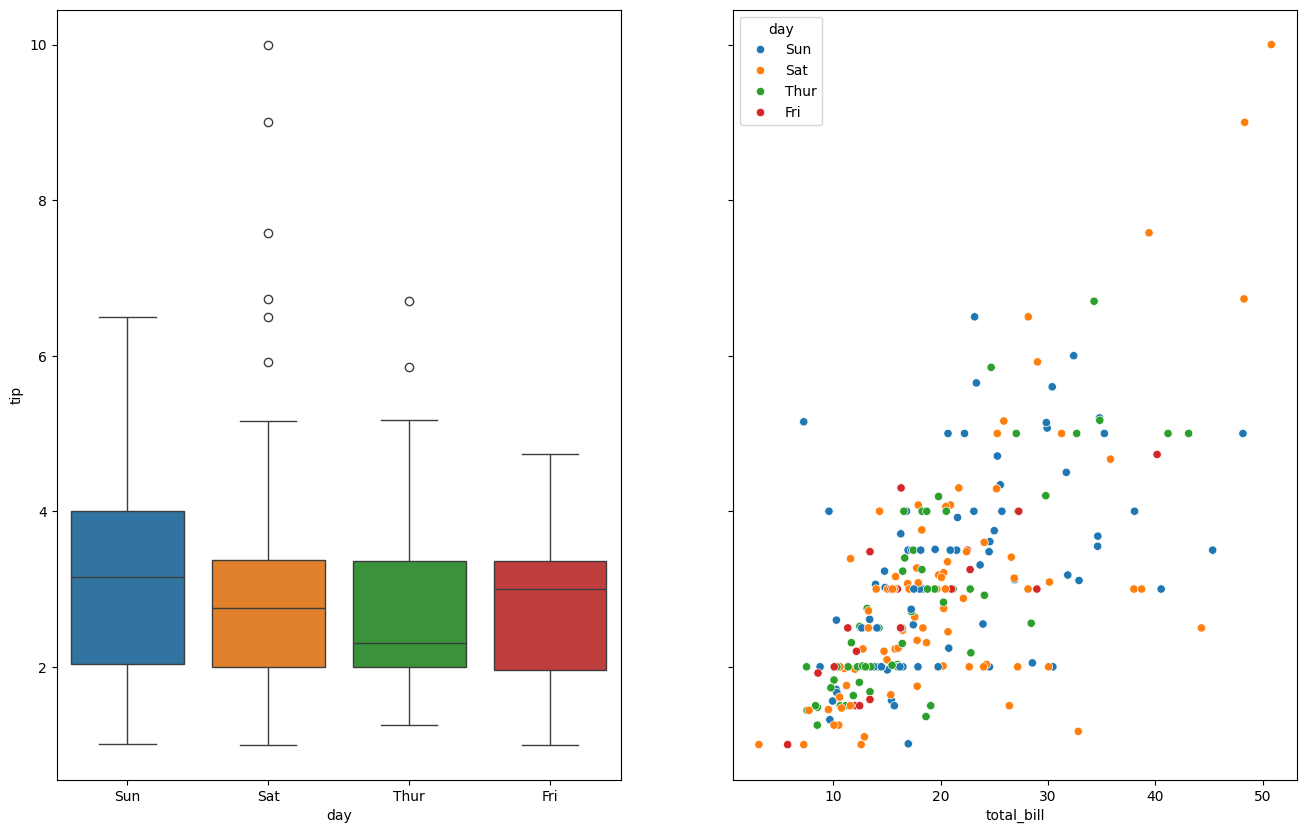

In [35]:
fig,ax =plt.subplots(1, 2, sharey=True, figsize=(16, 10))

sns.boxplot(x="day", y="tip", data=tips, ax=ax[0],hue='day')
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=ax[1]);

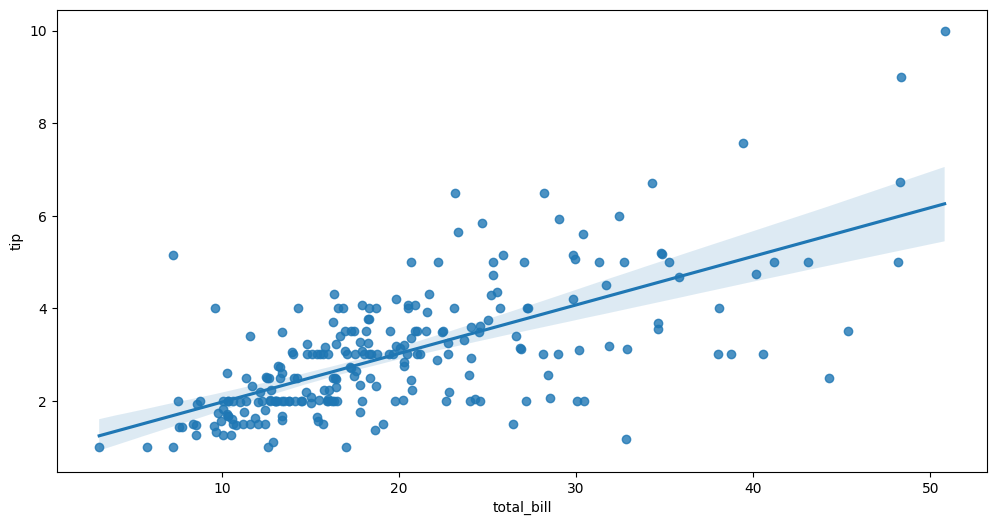

In [36]:
plt.figure(figsize=(12,6))
sns.regplot(x="total_bill", y="tip", data=tips);

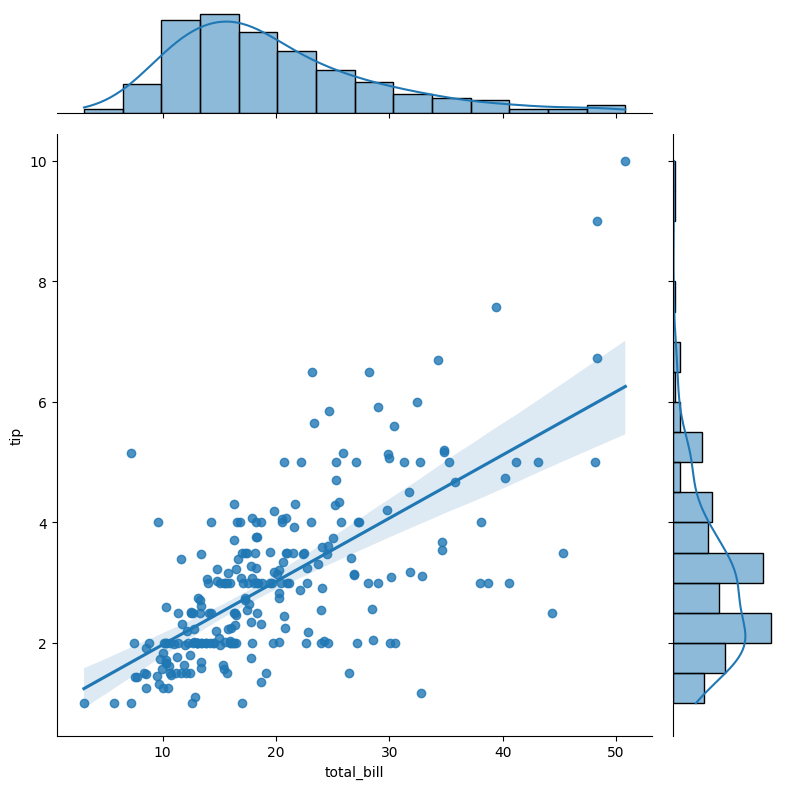

In [37]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg',height=8)


In [38]:
corr = tips.corr(numeric_only=True)
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


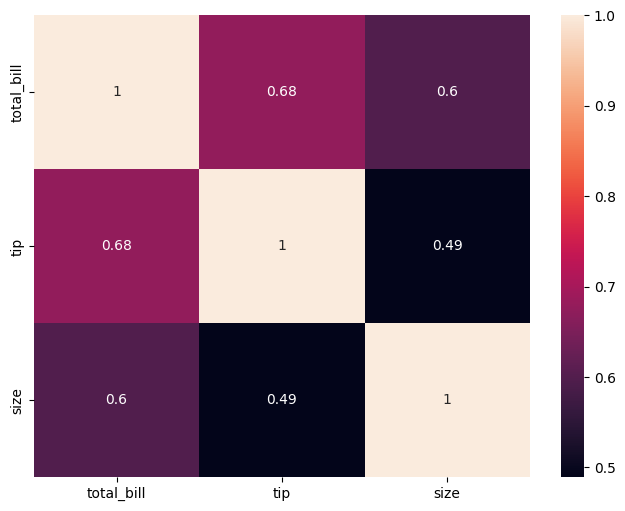

In [39]:
plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot = True);

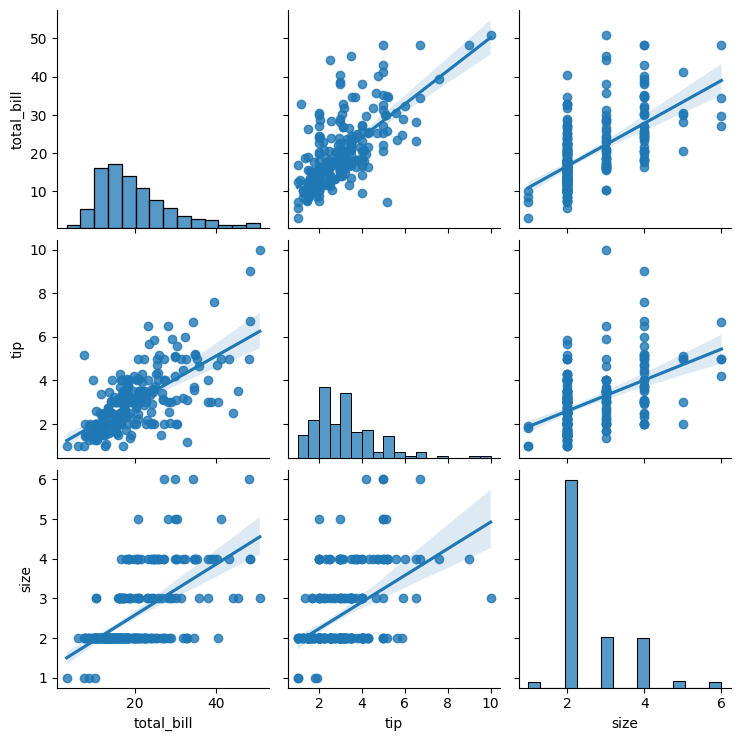

In [43]:
sns.pairplot(data=tips,kind="reg", height=2.5);

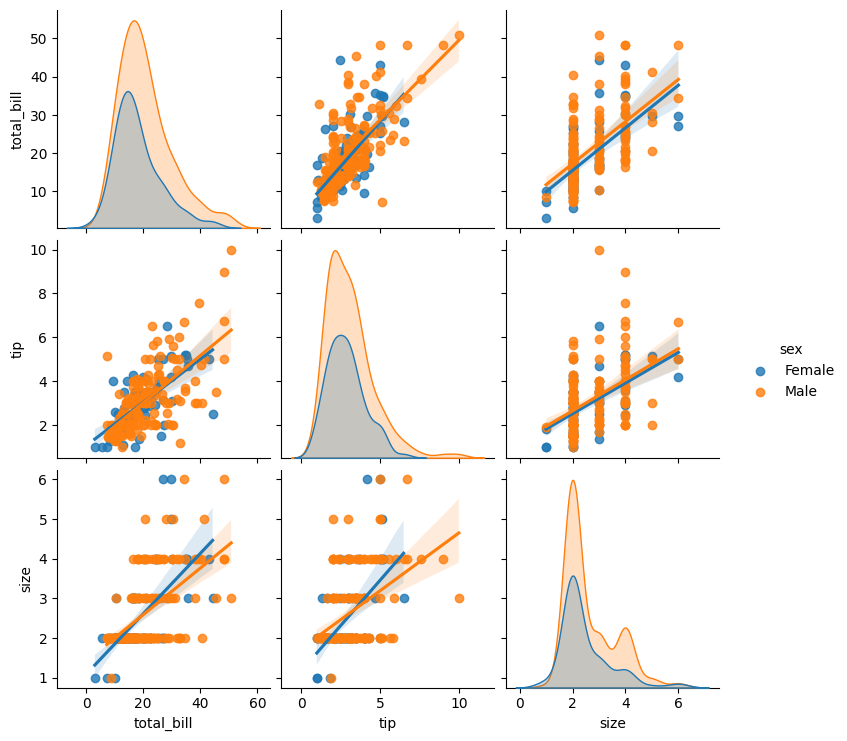

In [44]:
sns.pairplot(data=tips,kind="reg", height=2.5, hue="sex");

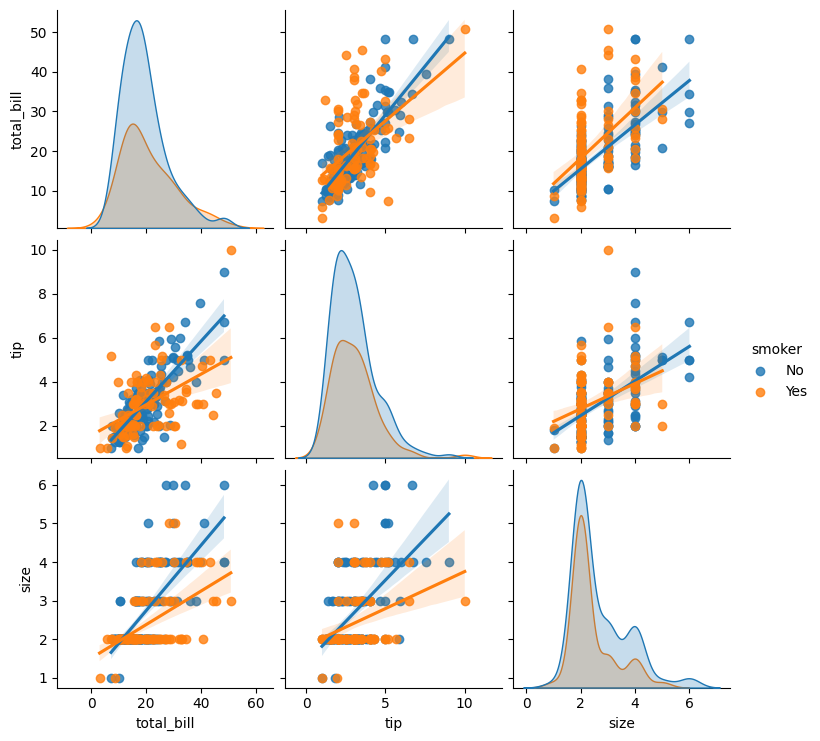

In [45]:
sns.pairplot(data=tips,kind="reg", height=2.5, hue="smoker")